## Import Reqired Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns

## Load data from CSV file

In [2]:
df = pd.read_csv("Renault_Cars24_cleaned.csv")
df = df.drop(columns=['Unnamed: 0'])
df.index = pd.RangeIndex(start=1, stop=len(df) + 1)

In [3]:
df.head()

,Car Name,Year of Manufacture,Kilometers Driven(in km),Fuel Type,Transmission,Price(in Lakhs)
1,Renault Duster 85 PS RXL,2015,42563,Diesel,Manual,5.38
2,Renault Kwid RXT 1.0,2016,45811,Petrol,Manual,2.99
3,Renault Kwid RXT 0.8,2016,26172,Petrol,Manual,2.58
4,Renault Kwid RXL,2020,40685,Petrol,Manual,3.73
5,Renault Kwid CLIMBER 1.0 AMT (O),2022,2908,Petrol,Automatic,5.43


## Check for missing values

In [4]:
print(df.isnull().sum())

Car Name                    0
Year of Manufacture         0
Kilometers Driven(in km)    0
Fuel Type                   0
Transmission                0
Price(in Lakhs)             0
dtype: int64


### Get some descriptive summary of the data

In [5]:
df.describe(include='all')

,Car Name,Year of Manufacture,Kilometers Driven(in km),Fuel Type,Transmission,Price(in Lakhs)
count,26,26.000000,26.000000,26,26,26.000000
unique,19,NaN,NaN,2,2,NaN
top,Renault Kwid RXT 1.0 AMT (O),NaN,NaN,Petrol,Manual,NaN
freq,4,NaN,NaN,24,15,NaN
mean,NaN,2018.961538,33241.000000,NaN,NaN,4.930000
std,NaN,2.087693,20687.973498,NaN,NaN,1.610324
min,NaN,2015.000000,2908.000000,NaN,NaN,2.580000
25%,NaN,2017.000000,22441.500000,NaN,NaN,3.480000
50%,NaN,2019.000000,29035.500000,NaN,NaN,4.955000
75%,NaN,2020.000000,44999.000000,NaN,NaN,6.237500


## Plot distribution of numerical features

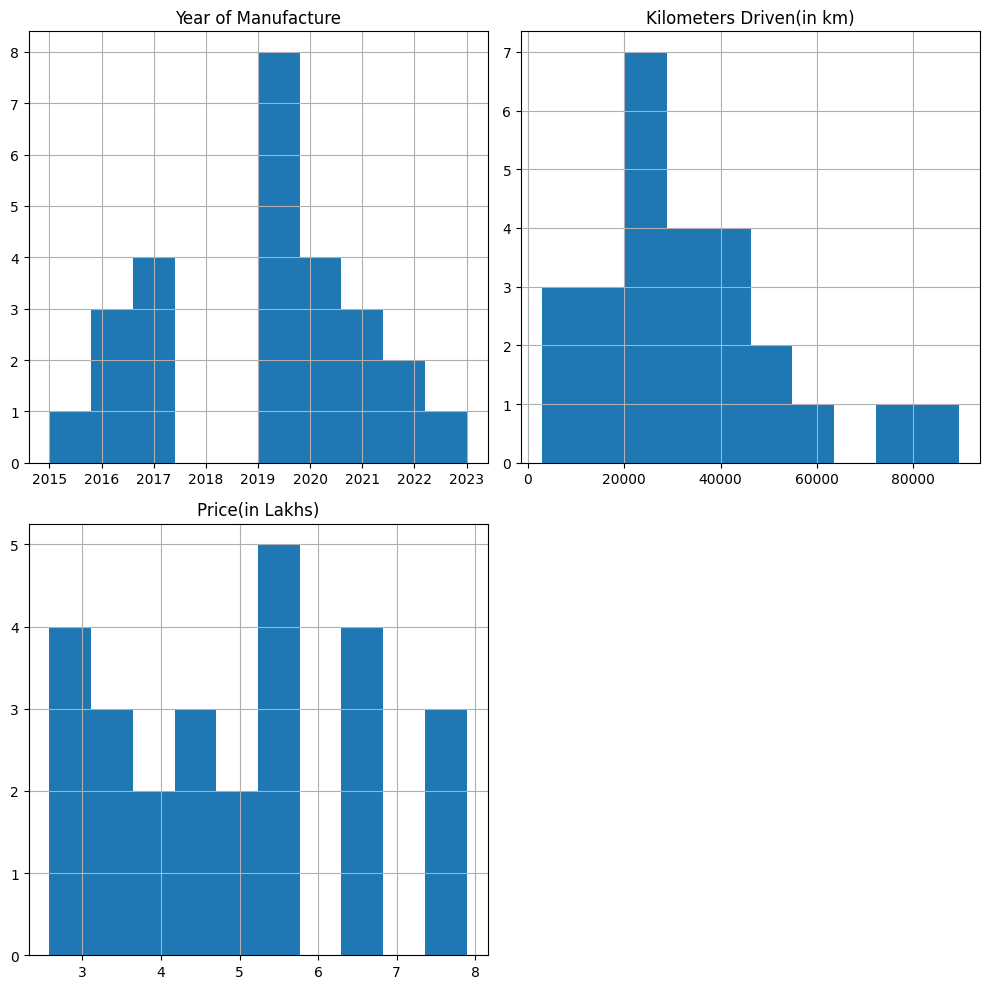

In [6]:
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

## Correlation matrix

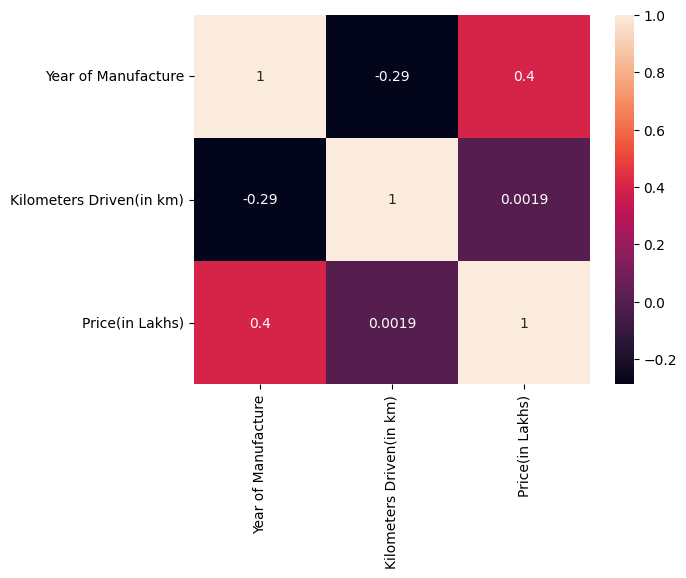

In [7]:
# Drop 'Car Name' and any columns with non-numerical data (e.g., 'Fuel Type' if it contains strings)
df_for_correlation = df.select_dtypes(include=[np.number])  # Select only numerical columns

correlation_matrix = df_for_correlation.corr()

# ... rest of your code for heatmap creation with Seaborn ...

sns.heatmap(correlation_matrix, annot=True)  # Add annotations for values

# Optional customization (choose a colormap)
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()



## Price Distribution

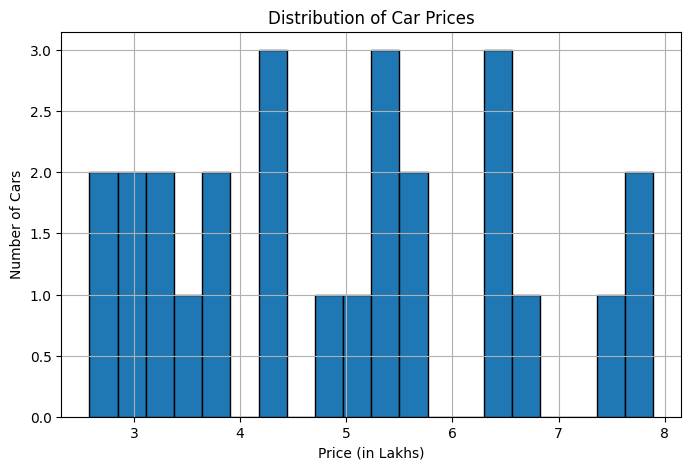

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price(in Lakhs)'], bins=20, edgecolor='black')  # Adjust bins for better visualization
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Prices')
plt.grid(True)
plt.show()

## Price by Year

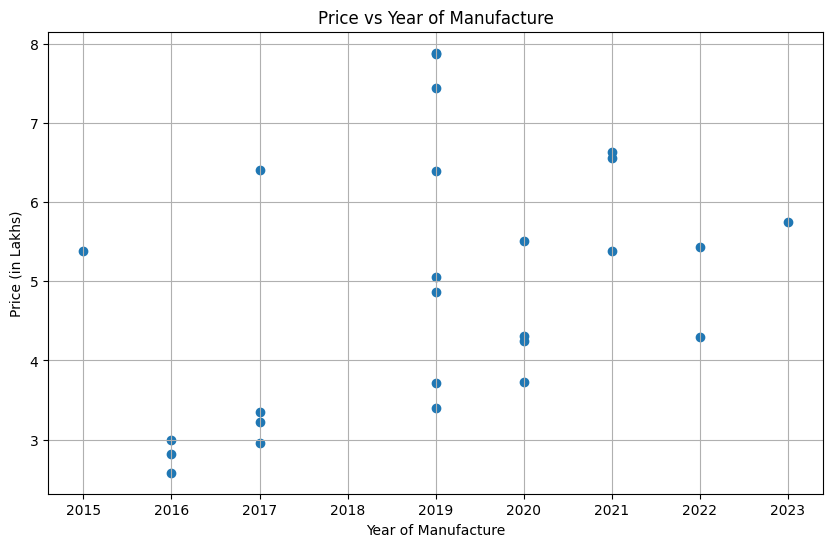

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year of Manufacture'], df['Price(in Lakhs)'])
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in Lakhs)')
plt.title('Price vs Year of Manufacture')
plt.grid(True)
plt.show()

## Price by Kilometers Driven

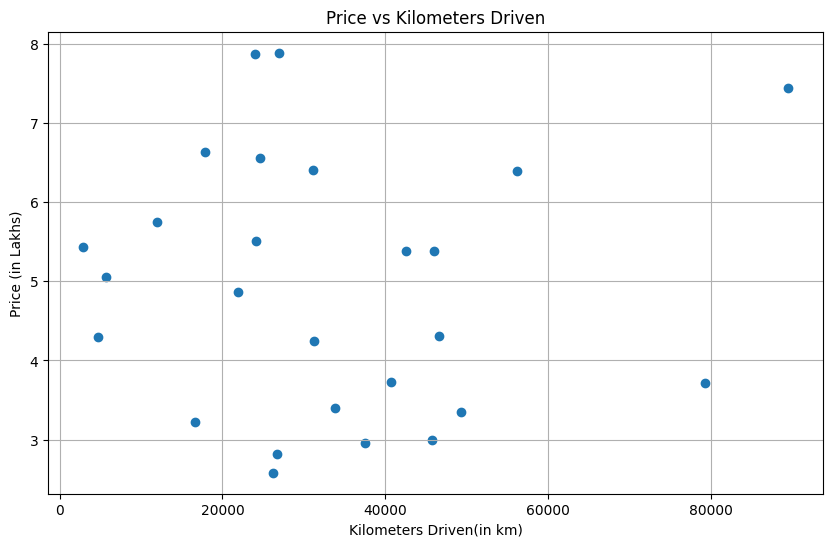

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilometers Driven(in km)'], df['Price(in Lakhs)'])
plt.xlabel('Kilometers Driven(in km)')
plt.ylabel('Price (in Lakhs)')
plt.title('Price vs Kilometers Driven')
plt.grid(True)
plt.show()

## Boxplots by Fuel Type:

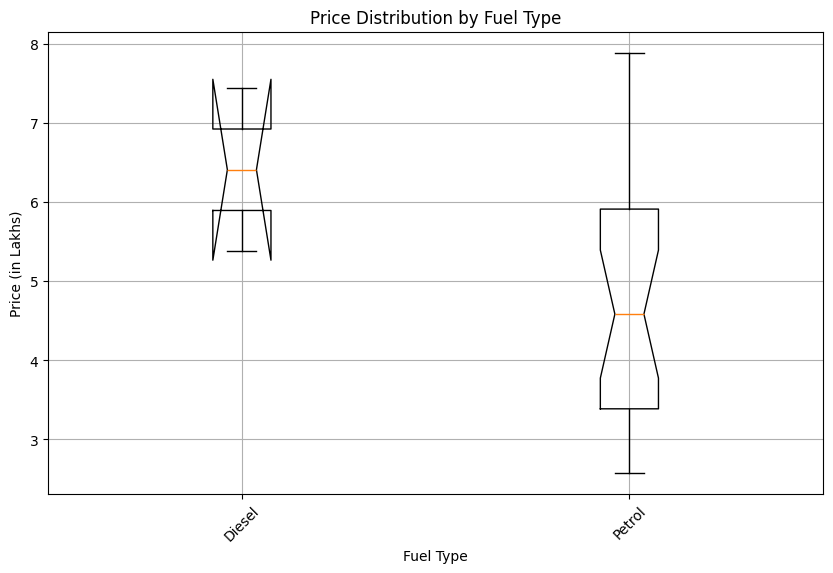

In [11]:
plt.figure(figsize=(10, 6))

# Extract unique fuel types
fuel_types = df['Fuel Type'].unique()

# Create an empty list to store price lists
price_lists = []

# Loop through each fuel type and collect prices
for fuel_type in fuel_types:
    price_list = df[df['Fuel Type'] == fuel_type]['Price(in Lakhs)'].tolist()
    price_lists.append(price_list)

# Create the boxplot
plt.boxplot(price_lists, notch=True, labels=fuel_types)
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakhs)')
plt.title('Price Distribution by Fuel Type')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Violin Plots by Transmission

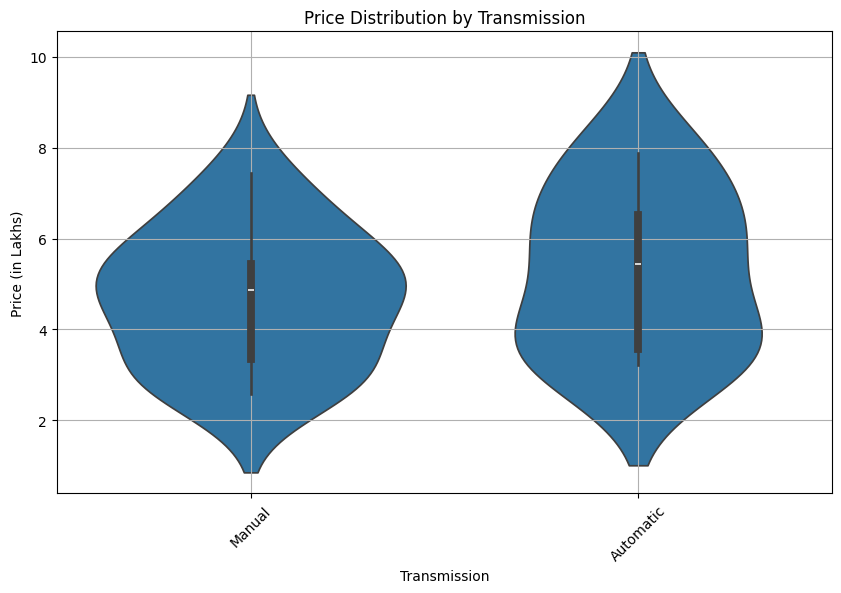

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Transmission', y='Price(in Lakhs)', data=df)  # Remove showmeans argument
plt.xticks(rotation=45)
plt.xlabel('Transmission')
plt.ylabel('Price (in Lakhs)')
plt.title('Price Distribution by Transmission')
plt.grid(True)
plt.show()

### Scatter Plot of Price vs Year with Color Gradient by Transmission

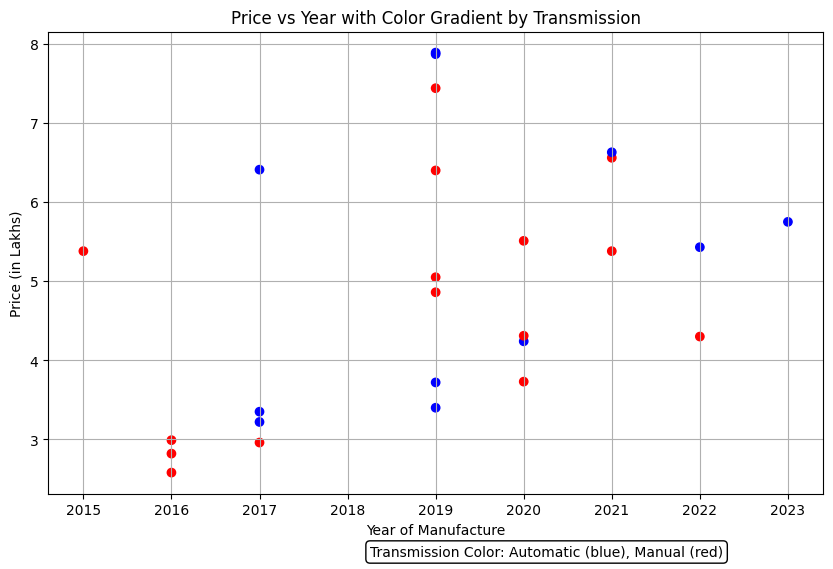

In [13]:
# Create a dictionary to map transmission types to numerical codes
transmission_code = {'Automatic': 0, 'Manual': 1}  # Adjust codes as needed

# Convert transmission types to numerical codes using the dictionary
df['Transmission_Code'] = df['Transmission'].map(transmission_code)

# Define a dictionary to map transmission codes to colors (assuming you have color choices)
transmission_color = {'Automatic': 'blue', 'Manual': 'red'}  # Adjust colors as needed

plt.figure(figsize=(10, 6))
cmap = mp.colors.ListedColormap(['blue', 'red'])
plt.scatter(df['Year of Manufacture'], df['Price(in Lakhs)'], c=df['Transmission_Code'], cmap=cmap)
# ... rest of your code for colorbar legend, labels, etc.

# Define legend text with transmission types and colors based on your actual color assignments in the 'transmission_code' dictionary
legend_text = "Transmission Color: Automatic (" + transmission_color['Automatic'] + "), Manual (" + transmission_color['Manual'] + ")"

# Add text annotation to the plot
plt.text(0.8, 0.001, legend_text, ha='right', va='bottom', transform=plt.gcf().transFigure, fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in Lakhs)')
plt.title('Price vs Year with Color Gradient by Transmission')
plt.grid(True)
plt.show()

### scatter plot for Year of Manufacture vs Kilometers Driven(in km) with Color Gradient by Price(in Lakhs)

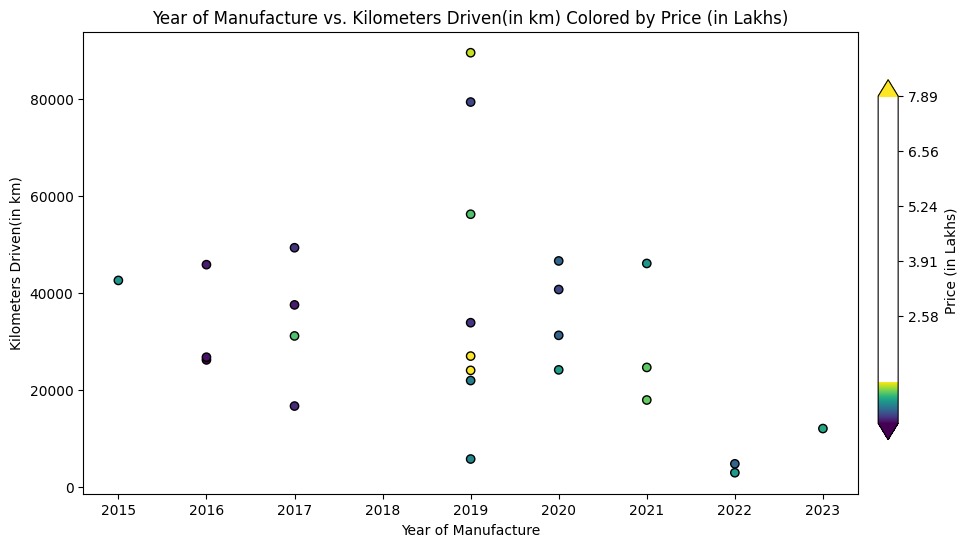

In [14]:
# Choose two columns to compare (excluding 'Car Name')
column1 = 'Year of Manufacture'  # Replace with your desired column name
column2 = 'Kilometers Driven(in km)'  # Replace with your desired column name

# Check if 'Price(in Lakhs)' exists, otherwise use 'Price' (if available)
price_column = 'Price(in Lakhs)'
if price_column not in df.columns:
  price_column = 'Price'  # Fallback if 'Price(in Lakhs)' is missing

# Handle cases where neither price column exists
if price_column not in df.columns:
  print("Error: Neither 'Price(in Lakhs)' nor 'Price' column found in DataFrame.")
else:
  # Convert price to Lakhs (if necessary)
  if price_column != 'Price(in Lakhs)':
    df['Price(in Lakhs)'] = df['Price'] / 100000  # Assuming conversion factor is 100000

  # Normalize the price column for color gradient (adjusted range)
  normalized_price = (df['Price(in Lakhs)'] - df['Price(in Lakhs)'].min()) / (df['Price(in Lakhs)'].max() - df['Price(in Lakhs)'].min())

  # Create the scatter plot with color gradient
  fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize for better layout
  ax.scatter(df[column1], df[column2], c=normalized_price, cmap='viridis', edgecolors='black')

  # Add labels and title for the scatter plot
  ax.set_xlabel(column1)
  ax.set_ylabel(column2)
  ax.set_title(f'{column1} vs. {column2} Colored by Price (in Lakhs)')

  # Create separate axes for colorbar (adjust position as needed)
  cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust position for colorbar (fixed indentation)

  # Colorbar with adjusted normalization range
  sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(min(normalized_price), max(normalized_price)))
  sm.set_array([])
  colorbar = plt.colorbar(sm, cax=cax, label='Price (in Lakhs)', extend='both')  # Include 'extend' for full color range

  # Set custom ticks and labels for the colorbar based on the actual price range in your data
  # Assuming 'Price(in Lakhs)' is the chosen price column (adjust min/max values and number of ticks)
  price_min = df['Price(in Lakhs)'].min()
  price_max = df['Price(in Lakhs)'].max()
  num_ticks = 5  # Adjust the number of ticks as desired
  colorbar.set_ticks(np.linspace(price_min, price_max, num_ticks))
  colorbar.set_ticklabels([f"{round(val, 2)}" for val in np.linspace(price_min, price_max, num_ticks)])

  plt.show()
